<a href="https://colab.research.google.com/github/kjmobile/B735/blob/main/4_Eigen_Faces_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Principal Component Analysis

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

## Principal Component Analysis
Consider these 200 points (see the following figure):

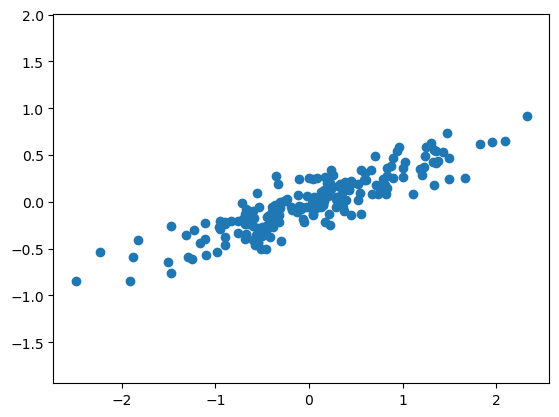

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's `PCA` estimator, we can compute this as follows:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the components and explained variance:

In [ ]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the components to define the direction of the vector and the explained variance to define the squared length of the vector (see the following figure):

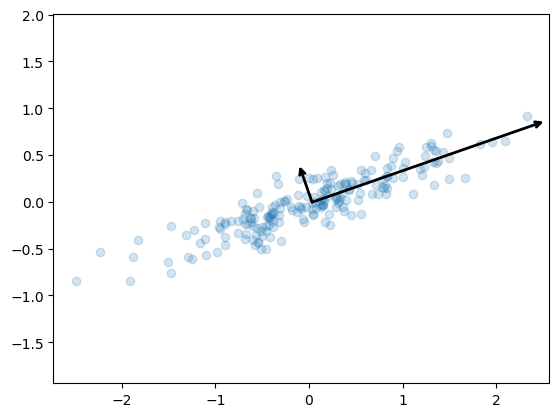

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

These vectors represent the principal axes of the data, and the length of each vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the principal components of the data.

## PCA -- Eigenfaces


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use the `"random"` eigensolver in the `PCA` estimator: it uses a randomized method to approximate the first $N$ principal components more quickly than the standard approach, at the expense of some accuracy.<br>
This trade-off can be useful for high-dimensional data (here, a dimensionality of 2,914 (= 62 x 27)).
We will take a look at the first 150 components:

In [ ]:
pca = PCA(150, svd_solver='randomized', random_state=42) # note sklearn used svd_solver (singluar vectro decomp) instead of evd (eigen vector decomp)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as *eigenvectors*,
so these types of images are often called *eigenfaces*; as you can see in the following figure, they are as creepy as they sound):

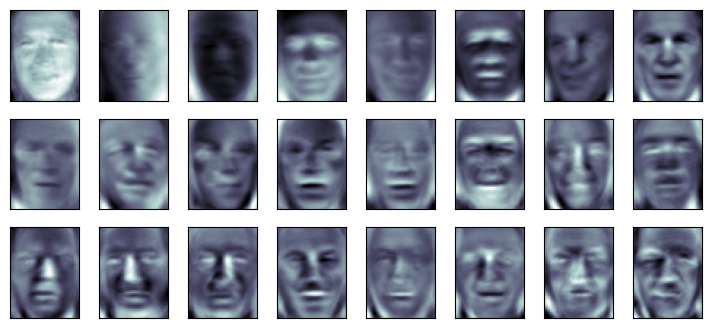

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving (see the following figure):

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.20798321, 0.3435222 , 0.41140532, 0.46882868, 0.5165094 ,
       0.5442091 , 0.5676278 , 0.58736163, 0.6059204 , 0.6237666 ,
       0.63831943, 0.6523001 , 0.6639505 , 0.67435545, 0.68427944,
       0.69355154, 0.7022461 , 0.7105172 , 0.7182727 , 0.7251067 ,
       0.731631  , 0.73788875, 0.7436205 , 0.74911165, 0.7542363 ,
       0.75923425, 0.7641141 , 0.76870626, 0.77308977, 0.777238  ,
       0.781131  , 0.7848579 , 0.7884581 , 0.79192346, 0.795317  ,
       0.7985517 , 0.8016555 , 0.8047159 , 0.8077239 , 0.8105629 ,
       0.8133342 , 0.816054  , 0.81874543, 0.82128793, 0.8237304 ,
       0.82612133, 0.8284533 , 0.8307706 , 0.8330375 , 0.83522075,
       0.8373231 , 0.8393816 , 0.8413934 , 0.84338874, 0.8453452 ,
       0.8472794 , 0.8491593 , 0.8510105 , 0.85279894, 0.854564  ,
       0.85630965, 0.8579955 , 0.8596297 , 0.8612398 , 0.86282367,
       0.8643575 , 0.86588454, 0.86737996, 0.8688356 , 0.87026656,
       0.8716731 , 0.87305856, 0.87443984, 0.8757795 , 0.87709

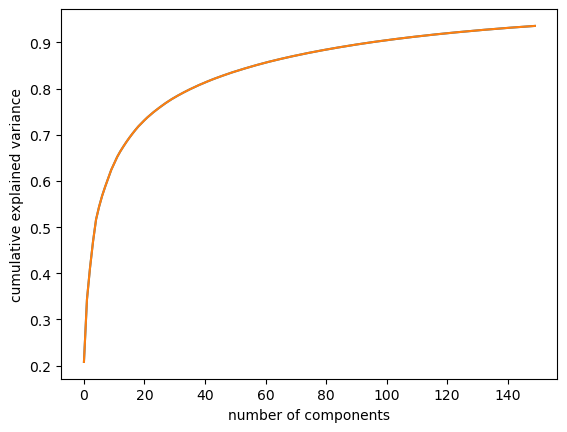

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The 150 components we have chosen account for just over 90% of the variance.<br>
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.<br>
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components (see the following figure):

In [ ]:
# Compute the components and projected faces
pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

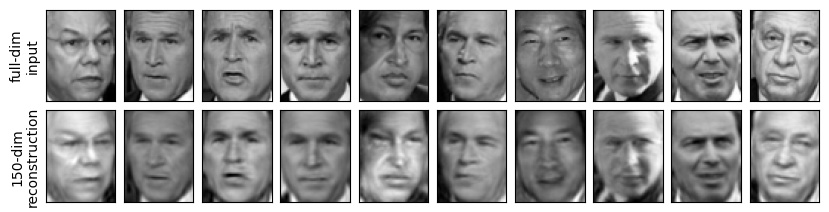

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
plt.show()

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the 2,914 initial features.